## Pharmacogenomics

## How to use this script?
#### updated 2024

1. All steps can be run on google colab with pre-installed R (https://colab.research.google.com/notebook#create=true&language=r)
2. Runing this script on server or local PC required R and PLINK installed.

## 1. Open R terminal following any method below

* RStudio
* RGui
* Jupyter and R notebooks
* text editors, such as vi(m)
* google colab (Jupyter based)

** use R in google colab, use this link https://colab.research.google.com/notebook#create=true&language=r

## 2. Test R script by making simple plot

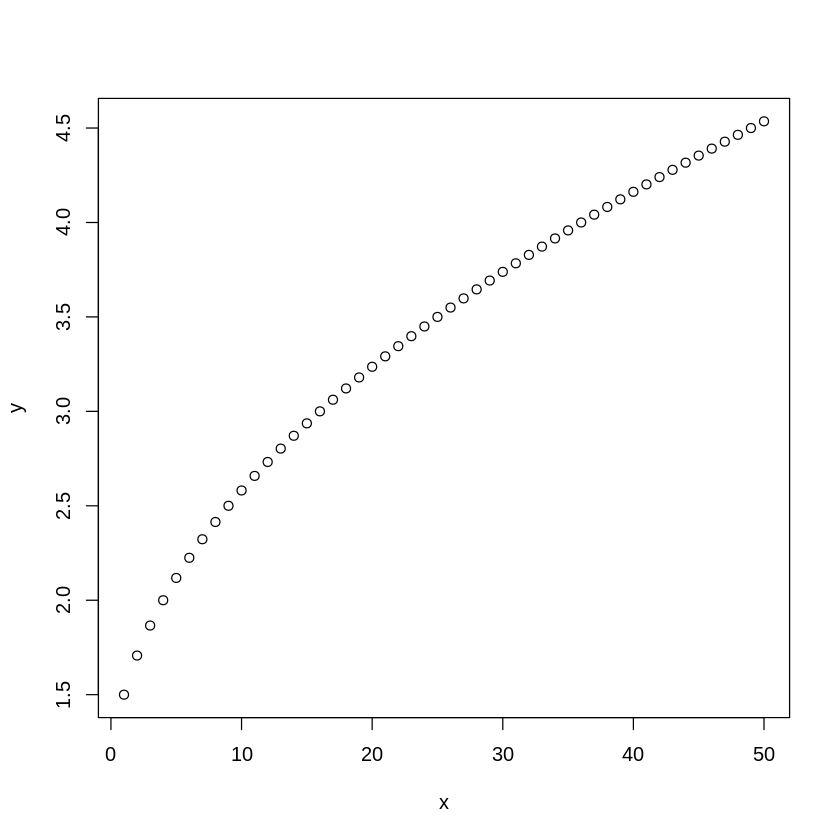

In [ ]:
x <- c(1:50)
y <- 1 + sqrt(x)/2
plot(x,y)

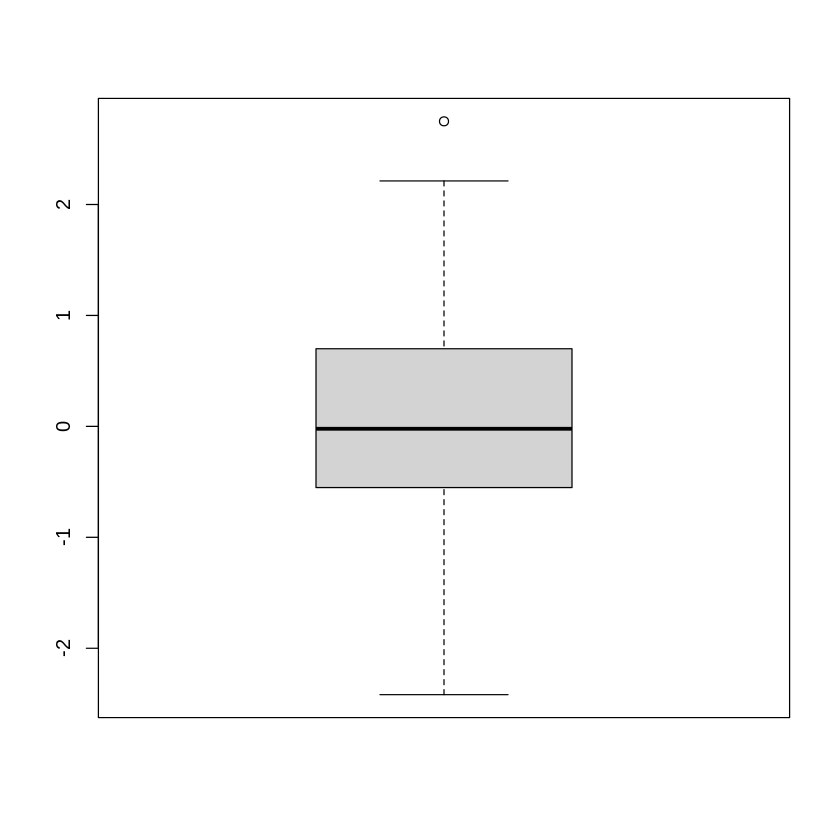

In [ ]:
x <- rnorm(100)
boxplot(x)

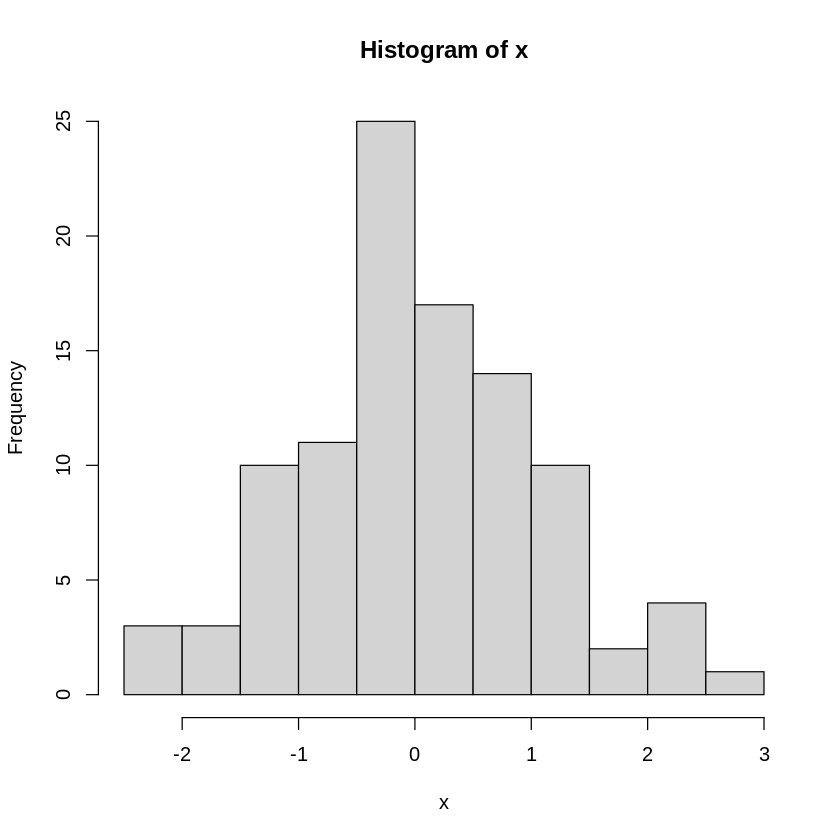

In [ ]:
hist(x)

## 3. Download and install PLINK
* PLINK is open-source software designed to perform a wide-range of basic, large-scale association analyses.
* Available for Linux/Mac/Windows(MS-DOS)
* Download from: https://www.cog-genomics.org/plink2

Note: to run bash command in R environment, use system() and system2()

In [ ]:
# Download PLINK (bash cammand)
system("wget https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20231211.zip")

In [ ]:
# Unzip file
system("unzip plink_linux_x86_64_20231211.zip")

In [ ]:
# list all files in current directory
system2("ls", stdout = TRUE, stderr = TRUE)

[1] "IC50_log2.txt"                   "IC50.txt"                       
 [3] "IC50.txt.1"                      "IC50.txt.2"                     
 [5] "IC50.txt.3"                      "Input_Pharmacogenomics"         
 [7] "LICENSE"                         "plink"                          
 [9] "plink_linux_x86_64_20231211.zip" "prettify"                       
[11] "sample_data"                     "toy.map"                        
[13] "toy.ped"

## 4. Test PLINK command

In [ ]:
# Successful PLINK installation
system2("./plink", stdout = TRUE, stderr = TRUE)

Warning message in system2("./plink", stdout = TRUE, stderr = TRUE):
“running command ''./plink' 2>&1' had status 10”


[1] "PLINK v1.90b7.2 64-bit (11 Dec 2023)           www.cog-genomics.org/plink/1.9/"
 [2] "(C) 2005-2023 Shaun Purcell, Christopher Chang   GNU General Public License v3"
 [3] ""                                                                              
 [4] "  plink <input flag(s)...> [command flag(s)...] [other flag(s)...]"            
 [5] "  plink --help [flag name(s)...]"                                              
 [6] ""                                                                              
 [7] "Commands include --make-bed, --recode, --flip-scan, --merge-list,"             
 [8] "--write-snplist, --list-duplicate-vars, --freqx, --missing, --test-mishap,"    
 [9] "--hardy, --mendel, --ibc, --impute-sex, --indep-pairphase, --r2, --show-tags," 
[10] "--blocks, --distance, --genome, --homozyg, --make-rel, --make-grm-gz,"         
[11] "--rel-cutoff, --cluster, --pca, --neighbour, --ibs-test, --regress-distance,"  
[12] "--model, --bd, --gxe, --logistic, --dosage, --lasso, --test-missing,"          
[13] "--make-perm-pheno, --tdt, --qfam, --annotate, --clump, --gene-report,"         
[14] "--meta-analysis, --epistasis, --fast-epistasis, and --score."                  
[15] ""                                                                              
[16] "\"plink --help | more\" describes all functions (warning: long)."              
attr(,"status")
[1] 10
attr(,"errmsg")
[1] "Resource temporarily unavailable"

## 5. Input files for Pharmacogenomics

The design of the experiment in Pharmacogenomics usually involves two parts :

* Molecular profile of biological samples or cell line in the study, which can
include measuring DNA level aberations such as SNVs and copy number changes, RNA expression levels, DNA methylation, and protein expression.
* Evaluation of subject response to drugs, for example, area under the plasma drug concentration-time curve (AUC), which can reflect the actual body exposure to drug after administration of a dose of the drug, and cell viability, where cell lines are treated with a panel of drugs, over a range of concentrations.

Then, the association between the molecular states of subjects and their variable responses to drug treatment is assessed through statistical approaches.

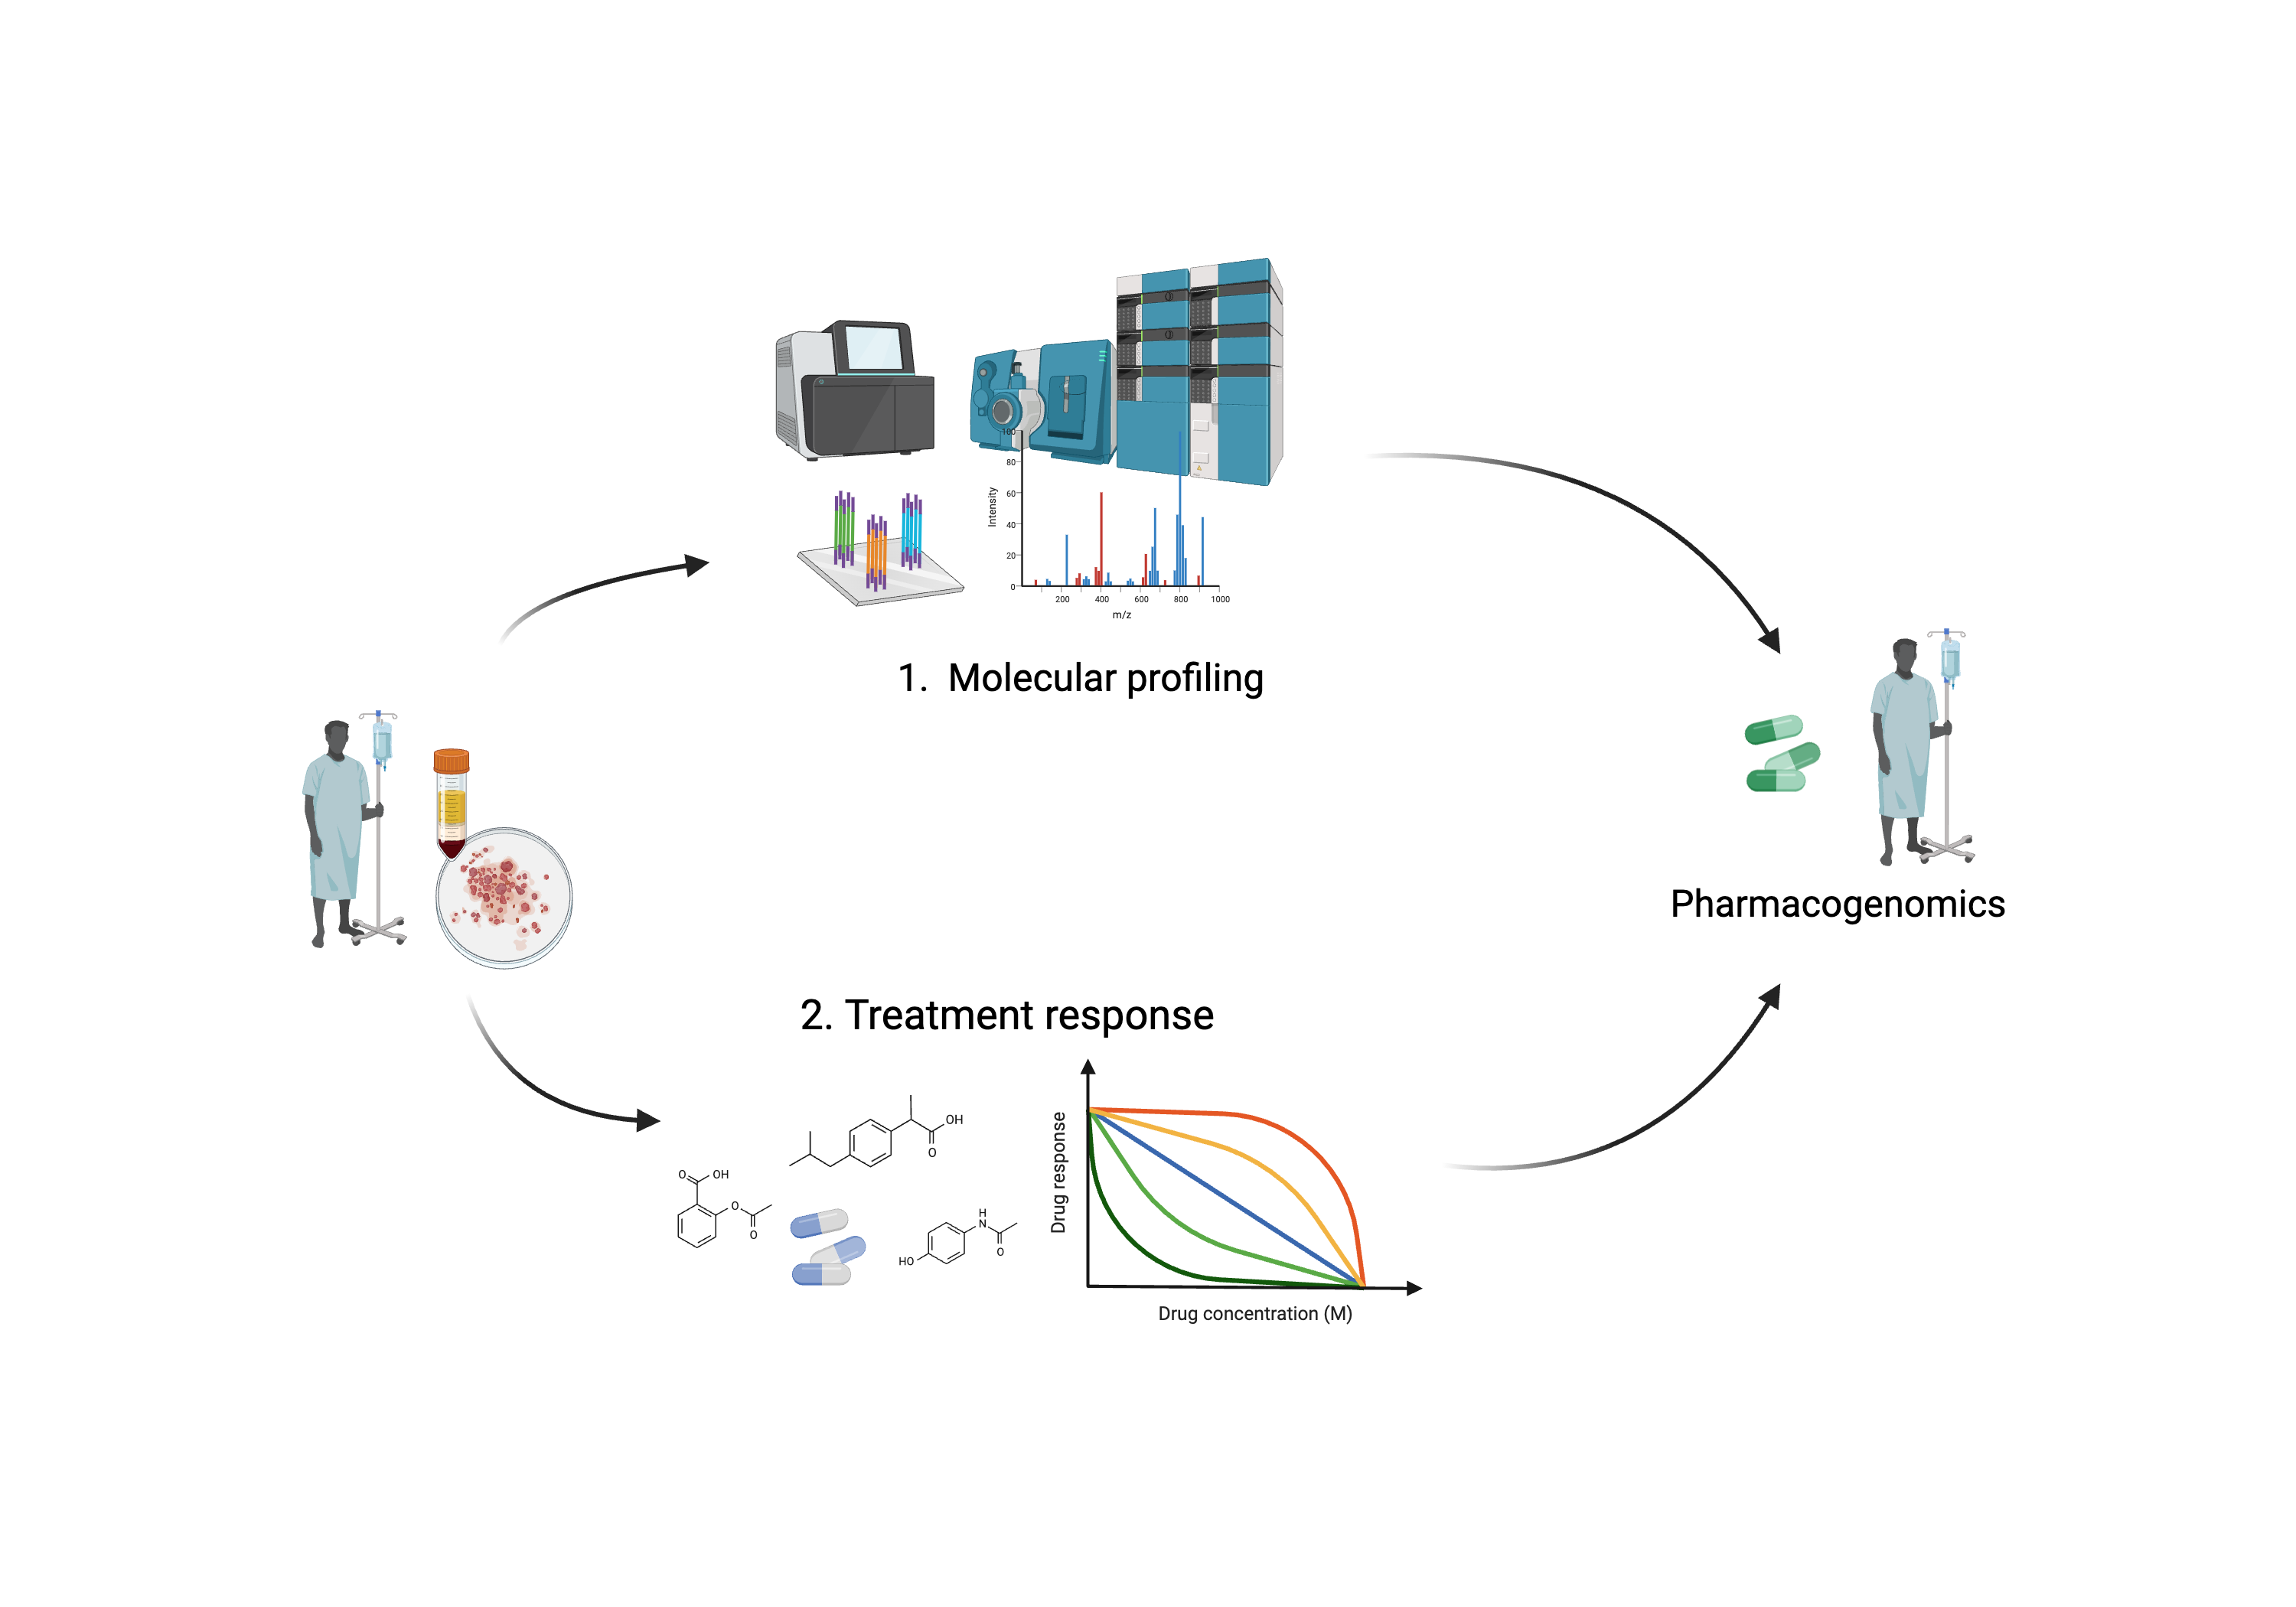

### 5.1 PLINK files
*   .ped file
<br>First six white-space delimited columns are required:

1.   Family ID
2.   Individual ID
3.   Paternal ID
4.   Maternal ID
5.   Sex (1=male; 2=female; other=unknown)
6.   Phenotype
Followed by 2n columns (n = number of SNPs) of genotypes

*   .map file
<br>This file contains four white-space delimited columns required:
1.   chromosome (1-22, X, Y or 0 if unplaced)
2.   variant ID
3.   Genetic distance (morgans)
4.   Base-pair position (bp units)

In [ ]:
# Download PLINK files
system("wget https://raw.githubusercontent.com/asangphukieo/NGS_workshop/main/Day5/Input_Pharmacogenomics/genotypes.bed")
system("wget https://raw.githubusercontent.com/asangphukieo/NGS_workshop/main/Day5/Input_Pharmacogenomics/genotypes.bim")
system("wget https://raw.githubusercontent.com/asangphukieo/NGS_workshop/main/Day5/Input_Pharmacogenomics/genotypes.fam")

### 5.2 Phenotype file (IC50)

In [ ]:
# download phenotype file
system("wget https://raw.githubusercontent.com/asangphukieo/NGS_workshop/main/Day5/Input_Pharmacogenomics/IC50.txt")

In [ ]:
data <- read.table("IC50.txt",header=T)

## To view the first few lines of the phenotype data:
head(data)

,FID,IID,GS451_IC50
,<int>,<int>,<dbl>
1,1001,1001,5.594256
2,1002,1002,8.525633
3,1003,1003,12.736739
4,1004,1004,12.175201
5,1005,1005,9.936742
6,1006,1006,9.163483


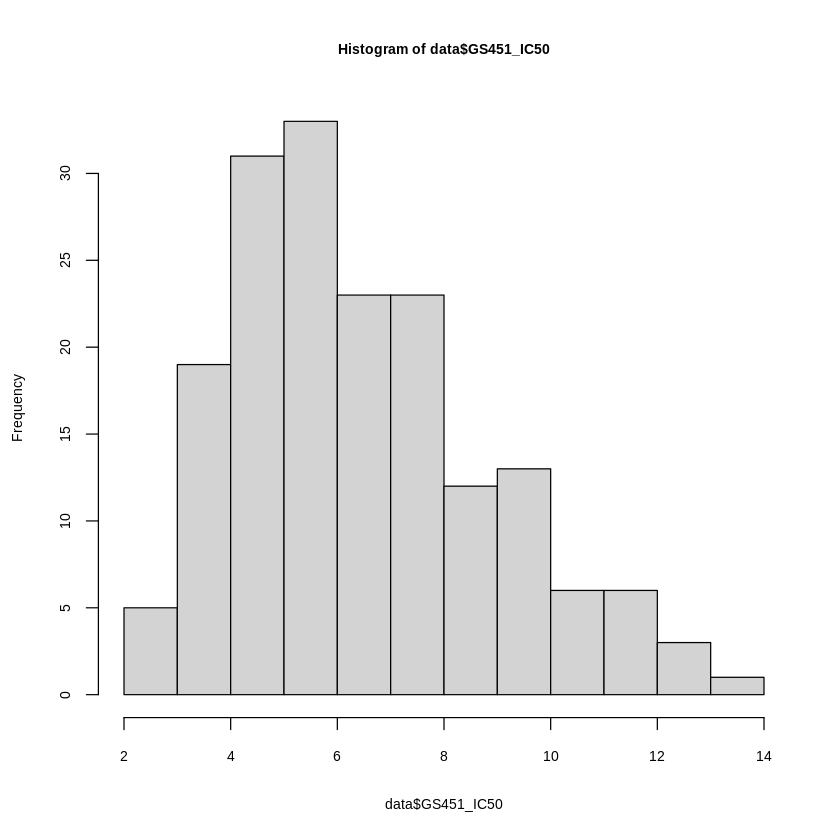

In [ ]:
## To view the distribution of the phenotype,
## make a histogram:

hist(data$GS451_IC50,cex.lab=0.7,cex.main=0.7,cex.axis=0.7)

The histogram looks skewed to the right (non-normal), so we can try a log2 transformation to make the phenotype more normal

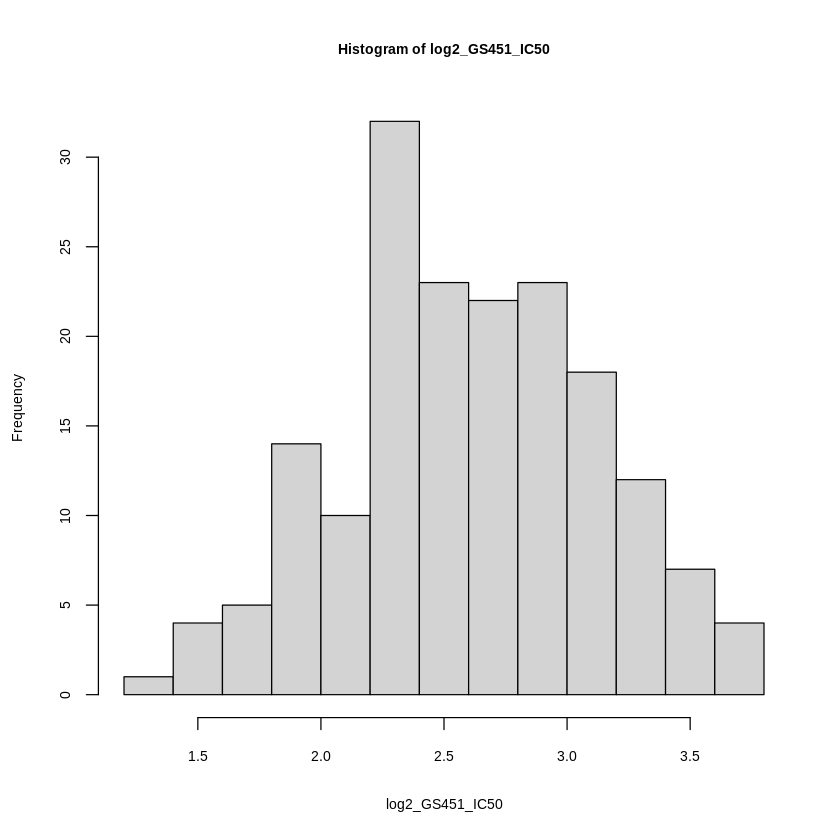

In [ ]:
#Transform the phenotype (IC50) in R
log2_GS451_IC50 <- log2(data$GS451_IC50)
hist(log2_GS451_IC50,cex.lab=0.7,cex.main=0.7,cex.axis=0.7)

## 6. Normal distribution test: Shapiro-Wilk test
Tests the null hypothesis that a sample came from a normally distributed population. P-values < 0.05 indicate a sample is likely not normally distributed.

In [ ]:
shapiro.test(data$GS451_IC50)


	Shapiro-Wilk normality test

data:  data$GS451_IC50
W = 0.9515, p-value = 1.033e-05


In [ ]:
shapiro.test(log2_GS451_IC50)


	Shapiro-Wilk normality test

data:  log2_GS451_IC50
W = 0.99074, p-value = 0.318


In [ ]:
#Add the log2(IC50) phenotype to our data file
data <- cbind(data,log2_GS451_IC50)
## view first few rows
data[1:5,]

,FID,IID,GS451_IC50,log2_GS451_IC50
,<int>,<int>,<dbl>,<dbl>
1,1001,1001,5.594256,2.483946
2,1002,1002,8.525633,3.091807
3,1003,1003,12.736739,3.670924


In [ ]:
## write new data frame to a file
#colnames(data)=gsub("FID","#FID",colnames(data))
data=na.omit(data)
write.table(data,file="IC50_log2.txt",quote=F,row.names=F)

## 7. Running the GWAS by PLINK
To save space and time, we will use a binary ped file (ends with .bed). Here is a list of the PLINK binary format files we will use:

* genotypes.bed (binary file, genotype information)
* genotypes.fam (plain text, first six columns of a .ped file)
* genotypes.bim (plain text, extended MAP file: two extra cols = allele names)

We will also use the separate phenotype file we just generated, which contains the log2(IC50) phenotype:
IC50_log2.txt (plain text, first two cols must contain the family ID (FID) and individual ID (IID), The following columns contain as many phenotypes as wanted.)

### 7.1 Run PLINK in R

In [ ]:
#run PLINK command in R
system("./plink --bfile genotypes --maf 0.05 --linear --adjust --pheno IC50_log2.txt --pheno-name log2_GS451_IC50 --out L2_IC50")

### Explanation of each option used:

--bfile: indicates location of plink files (.bim, .bed, .fam)

--maf: filter out SNPs with a minor allele frequency < 0.05

--linear: use a linear additive association test for each SNP

--adjust: tells plink to adjust the p-values for each SNP using various multiple-testing correction methods (separated output file of .adjusted)

--pheno: indicates location of phenotype file

--pheno-name: indicates column of phenotype in the phenotype file

--out: indicates prefix of output file name

## 7.2 GWAS Output
This run should take a few seconds and produce 3 output files:

L2_IC50.log L2_IC50.assoc.linear L2_IC50.assoc.linear.adjusted

The .log file contains the same information that is output to your screen during the run

In [ ]:
#load PLINK output to R
data<-read.table("L2_IC50.assoc.linear",header=T)

head(data)

,CHR,SNP,BP,A1,TEST,NMISS,BETA,STAT,P
,<int>,<chr>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,1,rs9699599,558185,G,ADD,85,0.27690,1.8980,0.06115
2,1,rs12138618,740098,A,ADD,86,-0.07265,-0.3671,0.71450
3,1,rs3131969,744045,G,ADD,164,0.06787,1.1350,0.25800
4,1,rs6672353,767376,A,ADD,85,0.04227,0.2873,0.77460
5,1,rs13302982,851671,G,ADD,166,0.08407,1.4140,0.15910
6,1,rs3121567,933331,T,ADD,166,-0.07329,-1.3410,0.18180


Each column means:

* CHR Chromosome
* SNP SNP identifier
* BP Physical position (base-pair)
* A1 Tested allele (minor allele by default)
* TEST Code for the test, default ADD meaning the additive effects of allele dosage
* NMISS Number of non-missing individuals included in analysis
* BETA Regression coefficient (slope) STAT Coefficient t-statistic
* P p-value for t-statistic

Notice the output is sorted by chromosome and base pair.

Significant variants


In [ ]:
#load PLINK output adjusted for multiple testing to R
adj_data<-read.table("L2_IC50.assoc.linear.adjusted",header=T)

head(adj_data,10)

,CHR,SNP,UNADJ,GC,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH,FDR_BY
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19,rs7257475,1.023e-10,5.146e-10,2.603e-05,2.603e-05,2.603e-05,2.603e-05,1.978e-05,0.0002576
2,19,rs10413538,1.555e-10,7.571e-10,3.955e-05,3.955e-05,3.955e-05,3.955e-05,1.978e-05,0.0002576
3,19,rs12972967,5.143e-08,1.764e-07,1.309e-02,1.309e-02,1.300e-02,1.300e-02,4.362e-03,0.0568100
4,2,rs10170982,1.344e-07,4.707e-07,3.420e-02,3.420e-02,3.362e-02,3.362e-02,8.549e-03,0.1113000
5,2,rs10186803,2.097e-07,7.067e-07,5.335e-02,5.335e-02,5.195e-02,5.195e-02,1.048e-02,0.1365000
6,2,rs17025871,2.472e-07,8.262e-07,6.289e-02,6.289e-02,6.096e-02,6.095e-02,1.048e-02,0.1365000
7,2,rs12622974,3.609e-07,1.171e-06,9.183e-02,9.182e-02,8.774e-02,8.773e-02,1.312e-02,0.1708000
8,2,rs13394005,4.294e-07,1.374e-06,1.093e-01,1.093e-01,1.035e-01,1.035e-01,1.366e-02,0.1779000
9,21,rs2826383,8.907e-07,2.680e-06,2.266e-01,2.266e-01,2.028e-01,2.028e-01,2.518e-02,0.3279000


### Output columns
1. CHR: Chromosome number
2. SNP: SNP identifer
3. UNADJ: Unadjusted p-value
4. GC: Genomic-control corrected p-values
5. BONF: Bonferroni single-step adjusted p-values
6. HOLM: Holm (1979) step-down adjusted p-values
7. SIDAK_SS: Sidak single-step adjusted p-values
8. SIDAK_SD: Sidak step-down adjusted p-values
9. FDR_BH: Benjamini & Hochberg (1995) step-up FDR control
10. FDR_BY: Benjamini & Yekutieli (2001) step-up FDR control

In [ ]:
# select variants that pass Bonferroni threshold of 0.05
sig_snp=adj_data[adj_data$BONF<=0.05,]

In [ ]:
sig_snp


,CHR,SNP,UNADJ,GC,BONF,HOLM,SIDAK_SS,SIDAK_SD,FDR_BH,FDR_BY
,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,19,rs7257475,1.023e-10,5.146e-10,2.603e-05,2.603e-05,2.603e-05,2.603e-05,1.978e-05,0.0002576
2,19,rs10413538,1.555e-10,7.571e-10,3.955e-05,3.955e-05,3.955e-05,3.955e-05,1.978e-05,0.0002576
3,19,rs12972967,5.143e-08,1.764e-07,1.309e-02,1.309e-02,1.300e-02,1.300e-02,4.362e-03,0.0568100
4,2,rs10170982,1.344e-07,4.707e-07,3.420e-02,3.420e-02,3.362e-02,3.362e-02,8.549e-03,0.1113000


## 8. Make boxplot of top SNP using R
First we must use PLINK to pull out the genotypes of rs7257475 in a format appropriate for R


In [ ]:
system("./plink --bfile genotypes --snp rs7257475 --recode A --out rs7257475_genotypes")

In [ ]:
gts<-read.table("rs7257475_genotypes.raw",header=T)
pts<-read.table("IC50_log2.txt",header=T)



In [ ]:
head(gts)

,FID,IID,PAT,MAT,SEX,PHENOTYPE,rs7257475_T
,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1001,1001,0,0,1,-9,0
2,1002,1002,0,0,1,-9,0
3,1003,1003,0,0,2,-9,0
4,1004,1004,0,0,1,-9,0
5,1005,1005,0,0,1,-9,0
6,1006,1006,0,0,2,-9,0


In [ ]:
head(pts)

,FID,IID,GS451_IC50,log2_GS451_IC50
,<int>,<int>,<dbl>,<dbl>
1,1001,1001,5.594256,2.483946
2,1002,1002,8.525633,3.091807
3,1003,1003,12.736739,3.670924
4,1004,1004,12.175201,3.605874
5,1005,1005,9.936742,3.312773
6,1006,1006,9.163483,3.195896


In [ ]:
# select only samples that present in phenotype file
gts=gts[gts$IID %in% pts$IID,]

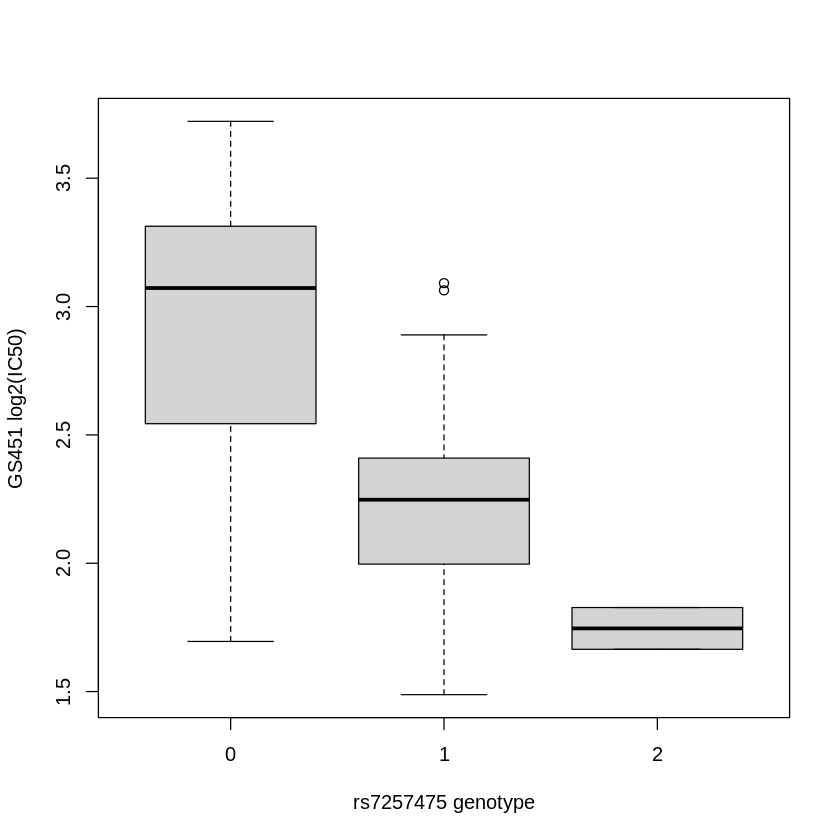

In [ ]:
boxplot(pts$log2_GS451_IC50~gts$rs7257475_T,ylab="GS451 log2(IC50)",xlab="rs7257475 genotype")

## Please interpret this result.

Modified from
https://github.com/hwheeler01/GWAS_workshop